<a href="https://colab.research.google.com/github/fatinirq/Content-Topic-Modeling/blob/main/CTM_9_12_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install  tomotopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.5 MB 3.9 MB/s 


In [ ]:
import json
#import spacy
import pandas as pd


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SpoilerData/LDA_CData.csv')
#data = [json.loads(line) for line in open('/content/drive/MyDrive/SpoilerData/CData.json', 'r')]
df=pd.DataFrame(data)

In [ ]:
data2 = [json.loads(line) for line in open('/content/drive/MyDrive/SpoilerData/CData.json', 'r')]
df_review=pd.DataFrame(data2)

In [ ]:
del data,data2
#sample = df.sample(frac=0.05)
#print(sample)

NameError: ignored

In [ ]:
df_review.head()

,review_sentences,user_id,timestamp,rating,has_spoiler,book_id,review_id
0,also high energy cosmic ray entering atmospher...,8842281e1d1347389f2ab93d60773d4d,2017-08-30,5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb
1,avail free december http www audible com mt el...,8842281e1d1347389f2ab93d60773d4d,2017-03-22,3,False,16981,a5d2c3628987712d0e05c4f90798eb67
2,cheat system live choice learn daniela say lif...,8842281e1d1347389f2ab93d60773d4d,2017-03-20,3,True,28684704,2ede853b14dc4583f96cf5d120af636f
3,http www npr org recommended reading understan...,8842281e1d1347389f2ab93d60773d4d,2016-11-09,0,False,27161156,ced5675e55cd9d38a524743f5c40996e
4,surfer love end freya finding meaning surfing ...,8842281e1d1347389f2ab93d60773d4d,2016-04-25,4,True,25884323,332732725863131279a8e345b63ac33e


In [ ]:
df['spoiled'].value_counts()

0    17102931
1      569724
Name: spoiled, dtype: int64

In [ ]:
df2=df[df['spoiled']==1]

In [ ]:
df2.head()

,review_sentence,spoiled,review_id
7,"['though', 'got', 'folding', 'proton', 'dimens...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb
8,"['would', 'happen', 'seti', 'station', 'receiv...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb
9,"['part', 'book', 'bit', 'dark', 'would', 'like...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb
10,"['like', 'book', 'unveiled', 'trisolaran', 'cu...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb
11,"['smart', 'way', 'build', 'empathy', 'also', '...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb


In [ ]:
# coding:utf-8

# 2.0  Use jieba Carry out word segmentation , Completely abandon inefficient NLPIR, use TextRank Algorithm assignment weight ( Actually measured textrank better )
# 2.1  use gensim To make tfidf
# 2.2 sklearn do tfidf and kmeans
# 2.3  take kmeans Change to BIRCH, Using tradition tfidf

# import logging
# import time
# import os
# import jieba
# import glob
# import random
# import copy
# import chardet
# import gensim
# from gensim import corpora,similarities, models
# from pprint import pprint
# import jieba.analyse
# from sklearn import feature_extraction
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import HashingVectorizer
# import os
# from sklearn.decomposition import PCA

In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.8.16.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.133+
Version          : #1 SMP Fri Aug 26 08:44:51 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.21.6
pytz             : 2022.6
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.32
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.9.5 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 7.9.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : No

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
np.random.seed(2018)
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Applying code of this report [link text](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [ ]:
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
           result.append(token)

    return result


In [ ]:
df2['index'] = df2.index

<ipython-input-16-0675536acf26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['index'] = df2.index


In [ ]:
df2.head()

,review_sentence,spoiled,review_id,index
7,"['though', 'got', 'folding', 'proton', 'dimens...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,7
8,"['would', 'happen', 'seti', 'station', 'receiv...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,8
9,"['part', 'book', 'bit', 'dark', 'would', 'like...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,9
10,"['like', 'book', 'unveiled', 'trisolaran', 'cu...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,10
11,"['smart', 'way', 'build', 'empathy', 'also', '...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,11


In [ ]:
my_string = "blah, lots  ,  of ,  spaces, here "
result = [x.strip() for x in my_string.split()]
# result is ["blah", "lots", "of", "spaces", "here"]
print (result)

['blah,', 'lots', ',', 'of', ',', 'spaces,', 'here']


In [ ]:
words = ["How","are","you","doing","?"]
sentence = ' '.join(words)
print(sentence)

How are you doing ?


In [ ]:
doc_sample = df2[df2['index'] == 11].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
["['smart',", "'way',", "'build',", "'empathy',", "'also',", "'understand',", "'gone',", "'across',", "'many',", "'century']"]


 tokenized and lemmatized document: 
['smart', 'build', 'empathy', 'understand', 'gone', 'century']


In [ ]:
processed_docs= df2['review_sentence'].map(preprocess)
processed_docs[:10]

7     [folding, proton, dimension, think, making, st...
8     [happen, seti, station, received, message, per...
9     [book, dark, like, think, human, reaction, dis...
10    [like, book, unveiled, trisolaran, culture, game]
11    [smart, build, empathy, understand, gone, cent...
12     [know, body, problem, unsolvable, math, problem]
13                            [game, maybe, come, book]
14                                       [loved, quote]
15    [long, history, scientific, progress, proton, ...
16                                  [neutron, electron]
Name: review_sentence, dtype: object

In [ ]:
processed_docs.head()

7     [folding, proton, dimension, think, making, st...
8     [happen, seti, station, received, message, per...
9     [book, dark, like, think, human, reaction, dis...
10    [like, book, unveiled, trisolaran, culture, game]
11    [smart, build, empathy, understand, gone, cent...
Name: review_sentence, dtype: object

In [ ]:
print(processed_docs[7])

['folding', 'proton', 'dimension', 'think', 'making', 'stuff', 'interesting', 'think']


In [ ]:
import gc
gc.enable()

In [ ]:
print(df2['review_sentence'][7])

['though', 'got', 'folding', 'proton', 'dimension', 'think', 'making', 'stuff', 'interesting', 'think', 'though']


In [ ]:
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# corpus=[]
# for review in df2['review_sentence']:
#   if len(review)>3:
#     x = [i.lower() for  i in word_tokenize(review.translate(str.maketrans('', '', string.punctuation))) if i.isalpha()]
#     corpus.append(' '.join(x))
# print(corpus)

In [ ]:
# print (len(corpus))

In [ ]:
from gensim.models import Word2Vec, FastText
# import pandas as pd
# import re

# from sklearn.decomposition import PCA

# from matplotlib import pyplot as plt
# import plotly.graph_objects as go

# import numpy as np

# import warnings
# warnings.filterwarnings('ignore')

#df = pd.read_csv('emails.csv')

In [ ]:
lst=list(df2['review_sentence'])

In [ ]:
processed_docs2= df['review_sentence'].map(preprocess)
processed_docs2[:10]

0                                      [special, book]
1    [started, slow, middle, started, interesting, ...
2    [love, good, science, fiction, push, thinking,...
3    [hugo, winner, translated, original, chinese, ...
4    [instance, intermixing, chinese, revolutionary...
5                               [book, science, alien]
6    [science, described, book, impressive, book, g...
7    [folding, proton, dimension, think, making, st...
8    [happen, seti, station, received, message, per...
9    [book, dark, like, think, human, reaction, dis...
Name: review_sentence, dtype: object

In [ ]:

sentences = [['i', 'like', 'apple', 'pie', 'for', 'dessert'],
           ['i', 'dont', 'drive', 'fast', 'cars'],
           ['data', 'science', 'is', 'fun'],
           ['chocolate', 'is', 'my', 'favorite'],
           ['my', 'favorite', 'movie', 'is', 'predator']]
w2v = Word2Vec(processed_docs2, min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=4)

print(w2v)

Word2Vec(vocab=51652, size=300, alpha=0.03)


In [ ]:
df2.head()

,review_sentence,spoiled,review_id,index
7,"['though', 'got', 'folding', 'proton', 'dimens...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,7
8,"['would', 'happen', 'seti', 'station', 'receiv...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,8
9,"['part', 'book', 'bit', 'dark', 'would', 'like...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,9
10,"['like', 'book', 'unveiled', 'trisolaran', 'cu...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,10
11,"['smart', 'way', 'build', 'empathy', 'also', '...",1,dfdbb7b0eb5a7e4c26d59a937e2e5feb,11


In [ ]:
print(w2v['proton'])
words = list(w2v.wv.vocab)

print(words)

#or show the dictionary of vocab words
w2v.wv.vocab

[-7.80370310e-02  2.15427712e-01 -5.72421141e-02 -1.09388605e-01
 -6.85883909e-02  3.94114792e-01 -2.35641003e-01 -1.77883267e-01
  7.27467239e-04 -2.44061410e-01  1.39707834e-01 -3.92290391e-02
  4.87735942e-02 -5.83495460e-02 -3.00763458e-01  5.01308024e-01
 -4.16514695e-01  1.63884714e-01 -9.86676589e-02 -2.49589950e-01
  2.81823486e-01 -2.94919372e-01  1.85131267e-01  7.32309967e-02
  4.40401316e-01 -3.17502618e-01 -3.16378772e-01  3.88549447e-01
 -4.44410704e-02 -6.30882382e-02  3.48752767e-01 -4.29298393e-02
 -2.75379062e-01 -3.85060310e-01 -1.45261750e-01 -2.52253503e-01
  1.34938404e-01  2.36311570e-01 -2.51380563e-01 -1.97435752e-01
 -1.98392913e-01 -1.36749715e-01  7.90147670e-03  2.61527359e-01
  1.59275904e-01 -1.34859055e-01 -3.17710757e-01 -9.30304918e-03
 -1.42962769e-01 -5.83521165e-02 -2.55374819e-01  3.08675021e-01
  1.22338936e-01 -1.93903863e-01  3.39161903e-02  5.84277362e-02
 -2.75469512e-01 -2.09793612e-01  3.43919098e-01  1.94648489e-01
 -3.99795979e-01  1.11418

{'special': <gensim.models.keyedvectors.Vocab at 0x7f27e06a6a30>,
 'book': <gensim.models.keyedvectors.Vocab at 0x7f27e06a6ac0>,
 'started': <gensim.models.keyedvectors.Vocab at 0x7f27e06a6eb0>,
 'slow': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b670>,
 'middle': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b6a0>,
 'interesting': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b610>,
 'blew': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b790>,
 'mind': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b850>,
 'love': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b880>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b8e0>,
 'science': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b940>,
 'fiction': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0b9a0>,
 'push': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0ba00>,
 'thinking': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0ba60>,
 'thing': <gensim.models.keyedvectors.Vocab at 0x7f25c8c0bac0>,
 'hugo': <gensim.models.keyed

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

<ipython-input-35-57044f261f85>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = w2v[w2v.wv.vocab]


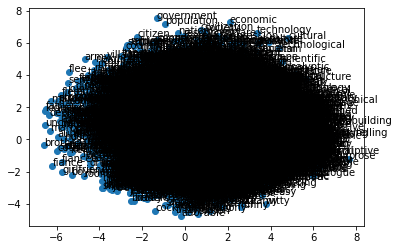

In [ ]:
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=10)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.vocab)

listAnchores=[]
for i, word in enumerate(words):
  lstDis=[]
  for j in range(len(words)):
    if i!=j:
      lstDis.append(np.sqrt(np.square(result[i, 0]-result[j, 0])+np.square(result[i, 0]-result[j, 0])))
  minDis= float(min(lstDis))
  if minDis>=0.015:
    listAnchores.append({'word':word,'i':i,'dis':lstDis})

  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [ ]:
resDf=pd.DataFrame.from_dict(listAnchores)

In [ ]:
resDf.head()

,word,i,dis
0,wife,186,"[8.071957, 12.498373, 8.032833, 13.49553, 8.75..."
1,intricate,256,"[7.685075, 3.2586582, 7.7241983, 2.2615018, 6...."
2,join,414,"[7.8198547, 12.246272, 7.780731, 13.243427, 8...."
3,house,421,"[7.261105, 11.687522, 7.221981, 12.684678, 7.9..."
4,plot,480,"[7.845786, 3.41937, 7.88491, 2.4222133, 7.1593..."


In [ ]:
resDf.to_csv('/content/drive/MyDrive/SpoilerData/out3.csv')

In [ ]:
print(listAnchores[0]['word'])

wife


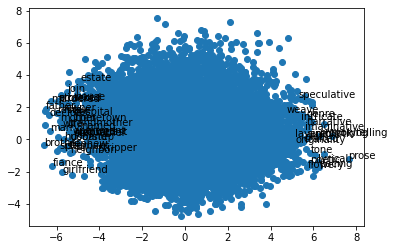

In [ ]:
plt.scatter(result[:, 0], result[:, 1])
for i in listAnchores:
  plt.annotate(i['word'], xy=(result[i['i'], 0], result[i['i'], 1]))
plt.show()

In [ ]:
print(result)

[[ 2.9779754e-03  8.3845937e-01  8.0469245e-01 ...  1.0437942e+00
   1.2773747e+00 -5.5226237e-01]
 [ 3.1329269e+00 -1.2586949e+00  9.3061484e-02 ... -1.1285003e+00
   7.8767020e-01 -1.2539679e+00]
 [-2.4686707e-02 -2.0337620e+00  3.8820347e-03 ... -1.9118128e+00
   1.2737262e+00 -6.3672823e-01]
 ...
 [ 2.3043734e-01 -4.5790148e-01 -6.0714346e-01 ...  1.4556064e-01
  -1.7539871e-01 -2.3414303e-01]
 [ 2.3240650e-01 -3.6881804e-01 -5.3194189e-01 ...  4.7097869e-02
  -2.5998032e-01 -3.3592549e-01]
 [ 2.7219141e-01 -3.7613723e-01 -5.7133925e-01 ...  1.0940996e-02
  -2.6667079e-01 -4.1175833e-01]]


In [ ]:
print(min(result[:,0]))

-6.5829782


In [ ]:
print(result.shape)

(51652, 10)


In [ ]:
print(len(listAnchores))

51


In [ ]:
import tomotopy as tp

In [ ]:
import tomotopy as tp
mdl = tp.CTModel(k=51)
for i in processed_docs.index:
    mdl.add_doc(processed_docs[i])


In [ ]:
for j in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(j, mdl.ll_per_word))


Iteration: 0	Log-likelihood: -18.167538535287715
Iteration: 10	Log-likelihood: -22.3898746176159
Iteration: 20	Log-likelihood: -23.18639440555002
Iteration: 30	Log-likelihood: -22.941206152075416
Iteration: 40	Log-likelihood: -22.691964370719628
Iteration: 50	Log-likelihood: -22.595103964791967
Iteration: 60	Log-likelihood: -22.548878135240553
Iteration: 70	Log-likelihood: -22.522934187471645
Iteration: 80	Log-likelihood: -22.50373594720997
Iteration: 90	Log-likelihood: -22.483721009500982


In [ ]:
for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=15))

Top 10 words of topic #0
[('book', 0.033740535378456116), ('like', 0.032953932881355286), ('friend', 0.024507934227585793), ('time', 0.021847262978553772), ('feel', 0.01938958466053009), ('life', 0.017874380573630333), ('best', 0.01782725751399994), ('think', 0.015623321756720543), ('thing', 0.012009304948151112), ('hard', 0.011476445943117142), ('felt', 0.0106499707326293), ('long', 0.010533973574638367), ('want', 0.010080862790346146), ('people', 0.00963862519711256), ('tell', 0.009413882158696651)]
Top 10 words of topic #1
[('girl', 0.05313998833298683), ('world', 0.03193161264061928), ('year', 0.030710188671946526), ('life', 0.022342635318636894), ('real', 0.02097051590681076), ('parent', 0.018940094858407974), ('people', 0.018416628241539), ('young', 0.017171408981084824), ('friend', 0.0142764737829566), ('memory', 0.014157503843307495), ('woman', 0.013848181813955307), ('father', 0.013840250670909882), ('sister', 0.013570585288107395), ('leave', 0.011230843141674995), ('family', 

for i in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))


for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))

In [ ]:
mdl.summary()

<Basic Info>
| CTModel (current version: 0.12.3)
| 545865 docs, 3328934 words
| Total Vocabs: 71826, Used Vocabs: 71826
| Entropy of words: 8.24717
| Entropy of term-weighted words: 8.24717
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 2
| Log-likelihood per word: -22.48372
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 51 (the number of topics between 1 ~ 32767)
| smoothing_alpha: [0.1] (small smoothing value for preventing topic counts to be zero, given as a single `float` in case of symmetric and as a list with length `k` of `float` in case of asymmetric.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 3077711292 (random seed)
| trained in version 0.12.3
|
<Parameters>
| prior_mean (Prior mean of Logit-normal for the per-document topic distribu

In [ ]:

mdl.save('/content/drive/MyDrive/SpoilerData/sample_hdp_model.bin')

In [ ]:
import tomotopy as tp
mdl = tp.CTModel.load('/content/drive/MyDrive/SpoilerData/sample_hdp_model.bin')

In [ ]:
df_review.head()

,review_sentences,user_id,timestamp,rating,has_spoiler,book_id,review_id
0,also high energy cosmic ray entering atmospher...,8842281e1d1347389f2ab93d60773d4d,2017-08-30,5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb
1,avail free december http www audible com mt el...,8842281e1d1347389f2ab93d60773d4d,2017-03-22,3,False,16981,a5d2c3628987712d0e05c4f90798eb67
2,cheat system live choice learn daniela say lif...,8842281e1d1347389f2ab93d60773d4d,2017-03-20,3,True,28684704,2ede853b14dc4583f96cf5d120af636f
3,http www npr org recommended reading understan...,8842281e1d1347389f2ab93d60773d4d,2016-11-09,0,False,27161156,ced5675e55cd9d38a524743f5c40996e
4,surfer love end freya finding meaning surfing ...,8842281e1d1347389f2ab93d60773d4d,2016-04-25,4,True,25884323,332732725863131279a8e345b63ac33e


In [ ]:
processed_docs2= df_review['review_sentences'].map(preprocess)
processed_docs2[:10]

0    [high, energy, cosmic, entering, atmosphere, d...
1    [avail, free, december, http, audible, ellison...
2    [cheat, live, choice, learn, daniela, life, wo...
3    [http, recommended, reading, understand, going...
4    [surfer, love, freya, finding, meaning, surfin...
5    [light, powerless, stop, turn, usher, bullet, ...
6    [instance, freeing, realize, gift, star, givin...
7     [numerous, people, publishing, told, book, year]
8    [overall, great, read, main, critique, irrelev...
9    [course, notion, cradle, cool, sure, feasibili...
Name: review_sentences, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs2)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
print(len(dictionary))

0 accelerator
1 accurate
2 accusing
3 alien
4 answering
5 apart
6 atmosphere
7 band
8 blew
9 body
10 book
324907


In [ ]:
#del processed_docs df

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print (len(dictionary))

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs2]
bow_corpus[4310]

In [ ]:

bow_corpus[4314]

In [ ]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],
                                               dictionary[bow_doc_4310[i][0]],
bow_doc_4310[i][1]))

In [ ]:
lst_topics=[]
lst_log=[]
for i in processed_docs2.index:
  if len(processed_docs2[i])>10:
    doc_inst = mdl.make_doc(processed_docs2[i])
    topic_dist, ll = mdl.infer(doc_inst)
  else:
    doc_inst=[]
    ll=0
  #print("Topic Distribution for Unseen Docs: ", topic_dist)
  #print("Log-likelihood of inference: ", ll)
  lst_topics.append(topic_dist)
  lst_log.append(ll)


In [ ]:
df_review['topics']=lst_topics
df_review['log']=lst_log

In [ ]:
df_review.to_csv('/content/drive/MyDrive/SpoilerData/intensity.csv')

In [ ]:

lda_model = gensim.models.LdaMulticore(bow_corpus[:10000000], num_topics=10, id2word=dictionary, passes=2, workers=4)

In [ ]:
del df

In [ ]:
import gc
gc.collect()

In [ ]:
for index, score in sorted(lda_model[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 20)))

In [ ]:
print(type(lda_model))

In [ ]:
print(lda_model)

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=60, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [ ]:
unseen_document = df[0]['review_sentences	']
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

In [ ]:
import joblib
from sklearn.feature_extraction.text import HashingVectorizer

print ('#----------------------------------------#')
print ('# #')
print ('# tf-idf #')
print ('# #')
print ('#----------------------------------------#\n')
def TFIDF(processed_docs):

    print (' Start tfidf:' )




    #  Read the corpus , One line of corpus is a document



    print("vectorizer started")
    #  Convert the words in the text into word frequency matrix , Matrix elements  a[i][j]  Express j Words in i Frequency of words in similar texts
    vectorizer = CountVectorizer()

    joblib.dump(vectorizer, 'vec_count.joblib')

    #  This class will count each word tfidf A weight
    transformer = TfidfTransformer()

    #  first fit_transform It's calculation tf-idf  the second fit_transform It is to turn the text into a word frequency matrix

    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

    #  Get all the words in the bag model
   # vec should be a HashingVectorizer instance


    #  take tf-idf Matrix extraction , Elements w[i][j] Express j Words in i Class text tf-idf The weight
    weight = tfidf.toarray()
    print (weight)

    # #  Output all words
    # result = open(docPath, 'w')
    # for j in range(len(word)):
    # result.write(word[j].encode('utf-8') + ' ')
    # result.write('\r\n\r\n')
    #
    # #  Output all weights
    # for i in range(len(weight)):
    # for j in range(len(word)):
    # result.write(str(weight[i][j]) + ' ')
    # result.write('\r\n\r\n')
    #
    # result.close()

    return weight

In [ ]:
print ('#----------------------------------------#')
print ('# #')
print ('#  drawing  #')
print ('# #')
print ('#----------------------------------------#\n')
def Draw(silhouette_avg, sample_silhouette_values, y, k):

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    #  Create a  subplot with 1-row 2-column
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)

    #  first  subplot  Contour coefficient points
    #  The scope is [-1, 1]
    ax1.set_xlim([-0.2, 0.5])

    #  hinder  (k + 1) * 10  In order to show these points more clearly
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    y_lower = 10

    for i in range(k): #  Traverse these clusters respectively

        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i)/k) #  Make a color
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7) #  This coefficient doesn't know what to do

        #  Add the category number of clustering to the contour coefficient point
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        #  Calculate the... Of the next point  y_lower y Axis position
        y_lower = y_upper + 10

    #  Make a vertical dotted line in the picture
    ax1.axvline(x=silhouette_avg, color='red', linestyle="--")

    plt.show()

In [ ]:
print ('#----------------------------------------#')
print ('# #')
print ('# PCA #')
print ('# #')
print ('#----------------------------------------#\n')
def PCA(weight, dimension):

    from sklearn.decomposition import PCA

    print (' Original dimension : ', len(weight[0]))
    print (' Start dimensionality reduction :')

    pca = PCA(n_components=dimension) #  initialization PCA
    X = pca.fit_transform(weight) #  Return dimension reduced data
    print (' Dimensionality reduction : ', len(X[0]))
    print (X)

    return X

In [ ]:
print ('#----------------------------------------#')
print ('# #')
print ('# BIRCH #')
print ('# #')
print ('#----------------------------------------#\n')
def birch(X, k): #  Lattice to be clustered , Number of clusters

    from sklearn.cluster import Birch

    print (' Start clustering :')

    clusterer = Birch(n_clusters=k)

    y = clusterer.fit_predict(X)
    print (' Output clustering results :')
    print (y)

    return y

In [ ]:
print ('#----------------------------------------#')
print ('# #')
print ('#  Profile factor  #')
print ('# #')
print ('#----------------------------------------#\n')
def Silhouette(X, y):

    from sklearn.metrics import silhouette_samples, silhouette_score

    print (' Calculate the contour coefficient :')

    silhouette_avg = silhouette_score(X, y) #  Average profile factor
    sample_silhouette_values = silhouette_samples(X, y) #  Contour coefficient of each point

    pprint(silhouette_avg)

    return silhouette_avg, sample_silhouette_values

In [ ]:
start=time.clock()
k = 3
weight, words = TFIDF(corpus)
    # #  Output all words
    # result = open(docPath, 'w')
    # for j in range(len(word)):
    # result.write(word[j].encode('utf-8') + ' ')
    # result.write('\r\n\r\n')
    #
    # #  Output all weights
    # for i in range(len(weight)):
    # for j in range(len(word)):
    # result.write(str(weight[i][j]) + ' ')
    # result.write('\r\n\r\n')
    #
    # result.close()
X = PCA(weight, dimension=60) #  Reduce the dimension of the original weight data
# y = kmeans(X, k) # y= Class labels after clustering
y = birch(X, k)
silhouette_avg, sample_silhouette_values = Silhouette(X, y) #  Profile factor
Draw(silhouette_avg, sample_silhouette_values, y, k)


end = time.clock()

In [ ]:

tfIdfTransformer = TfidfTransformer(use_idf=True,smooth_idf=False,)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(processed_docs)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)


In [ ]:
df3 = pd.DataFrame(newTfIdf[0].T.todense(), index=countVectorizer.get_feature_names(), columns=["TF-IDF"])
df3 = df3.sort_values('TF-IDF', ascending=False)
print (df3.head(25))
#print(w)

In [ ]:
ivec = InvertableHashingVectorizer(weight)
ivec.fit(corpus)  # e.g. each 10-th or 100-th document
names = ivec.get_feature_names()